## 模型训练
### 32005231文萧寒
#### 读取数据

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train_df = pd.read_csv('./data/train_features.csv')
train_df.head()

,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,diagnostics_Image-original_Hash,diagnostics_Image-original_Dimensionality,diagnostics_Image-original_Spacing,...,wavelet-LLL_gldm_GrayLevelVariance,wavelet-LLL_gldm_HighGrayLevelEmphasis,wavelet-LLL_gldm_LargeDependenceEmphasis,wavelet-LLL_gldm_LargeDependenceHighGrayLevelEmphasis,wavelet-LLL_gldm_LargeDependenceLowGrayLevelEmphasis,wavelet-LLL_gldm_LowGrayLevelEmphasis,wavelet-LLL_gldm_SmallDependenceEmphasis,wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis,wavelet-LLL_gldm_SmallDependenceLowGrayLevelEmphasis,Label
0,v3.0.1,1.23.5,2.2.1-gf9559,1.4.1,3.9.13,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'LoG': {'sigma': [1.0, 2.0, 3...",17dcf79a2d60e1c471132add7cb82f59b5e861bd,3D,"(1.0, 1.0, 1.0)",...,1004.577126,4415.527691,3.620690,20860.691745,0.023714,0.004766,0.692359,2900.040169,0.002452,0
1,v3.0.1,1.23.5,2.2.1-gf9559,1.4.1,3.9.13,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'LoG': {'sigma': [1.0, 2.0, 3...",87bec955277790e0cfc8a6054bd650f223fe677c,3D,"(1.0, 1.0, 1.0)",...,401.775762,2611.270526,3.589474,12063.354737,0.006609,0.002966,0.635859,1502.031585,0.002190,0
2,v3.0.1,1.23.5,2.2.1-gf9559,1.4.1,3.9.13,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'LoG': {'sigma': [1.0, 2.0, 3...",414b606f50c081b31c017a4058dbc774c232bf79,3D,"(1.0, 1.0, 1.0)",...,346.850661,1383.033994,3.031161,3762.280453,0.032830,0.007284,0.660672,967.038732,0.002903,0
3,v3.0.1,1.23.5,2.2.1-gf9559,1.4.1,3.9.13,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'LoG': {'sigma': [1.0, 2.0, 3...",ad2f2b15a1815933bd01f2d13f6d2bf44f6889b0,3D,"(1.0, 1.0, 1.0)",...,973.705880,4972.153558,2.578384,15386.152488,0.002793,0.001438,0.738656,3432.035457,0.001228,0
4,v3.0.1,1.23.5,2.2.1-gf9559,1.4.1,3.9.13,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'LoG': {'sigma': [1.0, 2.0, 3...",82540f04fa6a1c55a5101ce3b3cb784025f8c0b7,3D,"(1.0, 1.0, 1.0)",...,802.801994,4572.799094,2.570997,14990.291541,0.005334,0.004457,0.726943,2949.577847,0.004281,0


In [87]:
test_df = pd.read_csv('./data/test_features.csv')
test_df.head()

,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,diagnostics_Image-original_Hash,diagnostics_Image-original_Dimensionality,diagnostics_Image-original_Spacing,...,wavelet-LLL_gldm_GrayLevelVariance,wavelet-LLL_gldm_HighGrayLevelEmphasis,wavelet-LLL_gldm_LargeDependenceEmphasis,wavelet-LLL_gldm_LargeDependenceHighGrayLevelEmphasis,wavelet-LLL_gldm_LargeDependenceLowGrayLevelEmphasis,wavelet-LLL_gldm_LowGrayLevelEmphasis,wavelet-LLL_gldm_SmallDependenceEmphasis,wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis,wavelet-LLL_gldm_SmallDependenceLowGrayLevelEmphasis,Label
0,v3.0.1,1.23.5,2.2.1-gf9559,1.4.1,3.9.13,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'LoG': {'sigma': [1.0, 2.0, 3...",5365970c24ab4c09f9cc5d984570790b75360768,3D,"(1.0, 1.0, 1.0)",...,6138.293318,37499.701695,1.345763,53023.959322,0.003896,0.003885,0.924859,34226.818079,0.003882,0
1,v3.0.1,1.23.5,2.2.1-gf9559,1.4.1,3.9.13,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'LoG': {'sigma': [1.0, 2.0, 3...",0a11f08d38d92573a38823a9fe67f0cf33d55179,3D,"(1.0, 1.0, 1.0)",...,3084.896522,13771.897638,1.188976,18233.299213,0.008242,0.008233,0.952756,12656.547244,0.008231,0
2,v3.0.1,1.23.5,2.2.1-gf9559,1.4.1,3.9.13,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'LoG': {'sigma': [1.0, 2.0, 3...",7f255a8b1ba9b2675b3d48487aad1ceded85f2c7,3D,"(1.0, 1.0, 1.0)",...,493.712204,1539.156648,3.229508,4790.464481,0.027839,0.009502,0.644957,998.434462,0.006753,0
3,v3.0.1,1.23.5,2.2.1-gf9559,1.4.1,3.9.13,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'LoG': {'sigma': [1.0, 2.0, 3...",f28db2ed6f1621b32a8080d414e559499e4e04a7,3D,"(1.0, 1.0, 1.0)",...,1043.757531,3073.872633,2.129088,6721.617900,0.010213,0.004776,0.781854,2398.434751,0.003937,0
4,v3.0.1,1.23.5,2.2.1-gf9559,1.4.1,3.9.13,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'LoG': {'sigma': [1.0, 2.0, 3...",18b21fc602d77f223fc0f7438460db2b859d63ad,3D,"(1.0, 1.0, 1.0)",...,432.435962,1285.705882,3.901961,3464.602941,0.039743,0.008280,0.576142,925.498736,0.004703,0


#### 数据预处理

In [88]:
# 特征筛选
# 1. 删除类型不是数值的特征
train_df = train_df.select_dtypes(include=[np.number])
# 2. 删除缺失值过多的特征
train_df = train_df.dropna(axis=1, thresh=len(train_df) * 0.9)
# 3. 删除方差过小的特征
train_df = train_df.loc[:, train_df.var() > 1e-6]
# 4. 删除相关性过高的特征
corr = train_df.corr()
corr = corr.abs().unstack().sort_values(kind='quicksort', ascending=False)
corr = corr[corr != 1]
corr = corr[corr > 0.9]
corr = pd.DataFrame(corr).reset_index()
corr.columns = ['Feature1', 'Feature2', 'Correlation']
train_df = train_df.drop(columns=corr['Feature2'].unique())
# 打乱数据
train_df = train_df.sample(frac=1, random_state=0)
# 对特征进行Z-score标准化，Label不参与标准化
train_df.iloc[:, :-1] = (train_df.iloc[:, :-1] - train_df.iloc[:, :-1].mean()) / train_df.iloc[:, :-1].std()
# 保存成csv文件
train_df.to_csv('./data/train_features_selected.csv', index=False)
train_df.head()

,diagnostics_Image-original_Minimum,diagnostics_Image-original_Maximum,diagnostics_Mask-original_VolumeNum,diagnostics_Image-interpolated_Minimum,diagnostics_Image-interpolated_Maximum,diagnostics_Mask-interpolated_VolumeNum,original_shape_Elongation,original_shape_Flatness,original_shape_Sphericity,original_glcm_Imc1,...,wavelet-HHH_gldm_DependenceNonUniformityNormalized,wavelet-HHH_gldm_DependenceVariance,wavelet-HHH_gldm_SmallDependenceLowGrayLevelEmphasis,wavelet-LLL_firstorder_RootMeanSquared,wavelet-LLL_glcm_JointEnergy,wavelet-LLL_glcm_Imc1,wavelet-LLL_glcm_Imc2,wavelet-LLL_gldm_LargeDependenceLowGrayLevelEmphasis,wavelet-LLL_gldm_SmallDependenceLowGrayLevelEmphasis,Label
897,-0.311792,0.338783,-0.300592,-0.638515,0.589329,-0.300592,0.403256,-0.313650,0.005940,0.283820,...,-0.710230,0.393168,0.001184,-0.390504,-0.314583,-0.313233,0.555674,-0.215447,-0.189783,0
1507,0.374819,-1.355974,-0.300592,0.332297,-1.003144,-0.300592,1.352254,1.139938,0.805482,-1.006773,...,0.198552,-0.638466,-0.360424,0.276958,-0.103910,-0.112099,0.495008,1.138619,-0.407699,1
511,0.918925,-0.407908,-0.300592,1.284792,-0.105568,-0.300592,-0.599023,-1.322751,0.740542,-0.447152,...,0.621127,-0.854559,0.587075,-0.233971,0.892920,-0.353208,0.393708,-0.037283,1.494813,0
1368,0.608007,-1.099355,1.937616,0.662007,-0.739151,1.937616,-0.483729,-0.088152,-0.533962,0.529419,...,0.793643,-0.563919,-0.638962,-0.314972,0.002196,1.084714,-0.632184,-0.147076,-0.698983,1
310,0.426638,-1.300730,-0.300592,0.716958,-1.674197,-0.300592,0.003328,0.214871,0.568578,0.296512,...,0.514590,-0.848881,-0.086971,0.082185,0.178529,1.023116,-1.666969,0.091667,-0.591029,0


In [89]:
# 将test_df中的特征也进行筛选
test_df = test_df[train_df.columns]
# 对特征进行Z-score标准化，Label不参与标准化
test_df.iloc[:, :-1] = (test_df.iloc[:, :-1] - test_df.iloc[:, :-1].mean()) / test_df.iloc[:, :-1].std()
test_df.to_csv('./data/test_features_selected.csv', index=False)
test_df.head()

,diagnostics_Image-original_Minimum,diagnostics_Image-original_Maximum,diagnostics_Mask-original_VolumeNum,diagnostics_Image-interpolated_Minimum,diagnostics_Image-interpolated_Maximum,diagnostics_Mask-interpolated_VolumeNum,original_shape_Elongation,original_shape_Flatness,original_shape_Sphericity,original_glcm_Imc1,...,wavelet-HHH_gldm_DependenceNonUniformityNormalized,wavelet-HHH_gldm_DependenceVariance,wavelet-HHH_gldm_SmallDependenceLowGrayLevelEmphasis,wavelet-LLL_firstorder_RootMeanSquared,wavelet-LLL_glcm_JointEnergy,wavelet-LLL_glcm_Imc1,wavelet-LLL_glcm_Imc2,wavelet-LLL_gldm_LargeDependenceLowGrayLevelEmphasis,wavelet-LLL_gldm_SmallDependenceLowGrayLevelEmphasis,Label
0,-0.400704,2.352888,-0.330578,-0.544019,2.558541,-0.330578,0.652875,-0.064057,0.486008,-2.771115,...,-0.605292,0.782654,0.436232,7.310286,-0.066390,-2.189003,0.829286,-0.170957,0.070045,0
1,-0.823557,0.957573,-0.330578,-0.939737,1.225769,-0.330578,1.033258,0.658855,1.006724,-3.648160,...,0.157474,-0.298022,0.479063,1.975339,0.562001,-2.506755,0.828893,-0.160211,1.138041,0
2,1.310846,-1.248508,-0.330578,1.491105,-1.059475,-0.330578,1.320790,1.210696,0.713647,0.300758,...,-1.128827,1.364486,0.100004,-0.437714,-0.210307,-0.331764,0.717288,-0.111750,0.775160,0
3,-0.763150,-0.663960,-0.330578,-0.826675,-0.992059,-0.330578,1.011604,0.620265,0.635149,-0.066388,...,-0.289261,-0.122141,0.138508,0.237515,-0.265288,-0.824856,0.807839,-0.155335,0.083467,0
4,-0.058394,0.506946,-0.330578,0.134356,0.722739,-0.330578,-1.028339,-0.754729,0.645516,-0.027221,...,-0.053718,-0.544642,0.318570,0.230105,-0.084790,-0.626187,0.759966,-0.082313,0.271734,0


### 使用SVM进行分类

In [90]:
# 使用SVM进行分类训练
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score

# 划分训练集和测试集
X_train = train_df.drop(columns=['Label'])
y_train = train_df['Label']
X_test = test_df.drop(columns=['Label'])
y_test = test_df['Label']

#### 使用网格搜索进行超参数调优，并训练SVM分类器

In [91]:
#使用网格搜索进行超参数调优
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_estimator_)

# 训练SVM分类器
clf = SVC(C=1000, gamma=0.001, kernel='rbf')
clf.fit(X_train, y_train)

# 预测测试数据
y_pred = clf.predict(X_test)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.742 total time=   0.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.744 total time=   0.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.741 total time=   0.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.741 total time=   0.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.741 total time=   0.2s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.742 total time=   0.2s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.744 total time=   0.2s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.741 total time=   0.2s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.741 total time=   0.2s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.741 total time=   0.2s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.849 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

#### 计算性能指标

In [92]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print('accuracy: %.4f' % accuracy)
print('precision: %.4f' % precision)
print('recall: %.4f' % recall)
print('auc: %.4f' % auc)

accuracy: 0.7400
precision: 0.9286
recall: 0.5200
auc: 0.7400


#### 绘制ROC曲线

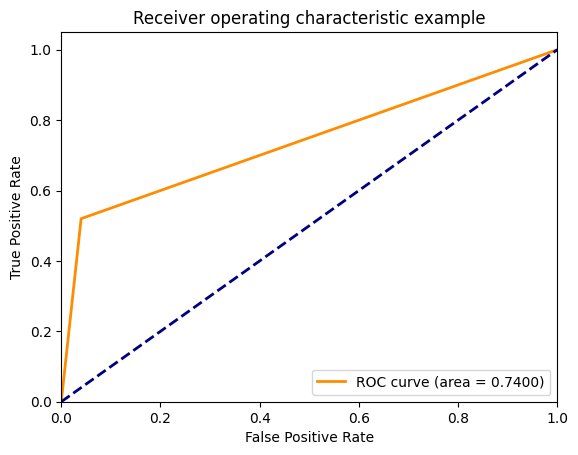

<Figure size 640x480 with 0 Axes>

In [93]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.4f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()